In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tt_df = pd.read_csv('../Misc./titanic.csv')

1.) Indicating why you chose the model you did (1 point):

We chose to use a logistic regression, because the outcomes we're trying to predict are either are died (0) or survived (1), meaning a linear regression wouldn't be able to predict the probability of the outcome, given it has points lying outside that range of outcomes. A logistic regression, however, would squeeze the predictions between the only two possibilites.

2.) The code itself (4 points)

In [40]:
from statsmodels.formula.api import logit

class_age_int = logit('Survived ~ Pclass * Age', data = tt_df).fit()
print(class_age_int.params)

Optimization terminated successfully.
         Current function value: 0.579426
         Iterations 5
Intercept     3.632373
Pclass       -1.265066
Age          -0.043383
Pclass:Age    0.000689
dtype: float64


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

tt_regression_columns = tt_df.dropna(subset = ['Age'], inplace = True)
tt_regression_columns = tt_df[['Survived', 'Pclass', 'Age']]

X = tt_regression_columns.drop('Survived', axis = 1)
y = tt_regression_columns['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 82020)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

regression = LogisticRegression(random_state = 32).fit(X_train, y_train)
y_predicted = regression.predict(X_test)
y_predicted

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [37]:
regression.score(X_test, y_test)

0.7132867132867133

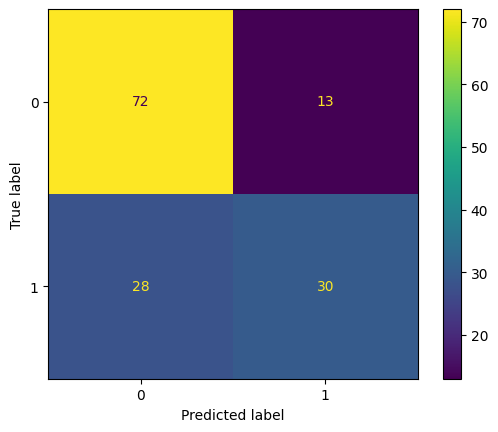

In [38]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)